# Data Preprocessing and EDA

----

## PROJECT TERMINOLOGIES

#### IMPORTANT NOTE
Throughout the notebook, the term "tweet" refers specifically to the context of the search terms that were utilized to query the API for data extraction. The context for these search terms, which now represent the tweets, as their `topic` or Labels, can be found in the `"3. Raw Dataset"` section.


#### TWITTER


- **Anchor**: The term used to tag a particular person, entity or another twitter handle. Such as "@CUBoulder" or "@BoulderPolice" are anchor terms used to tag University of Colorado Boulder twitter handle, and official Boulder County Police handle.


- **Hastag**: The term used to highlight a common word or a phrase to make it detectable for seach engine crawlers, other Twitter users and could be associated with trending topics. Such as "BlackLivesMatter" or "BLM" is not an entity but a term which could be used by other Twitter account holders.

---

## Contents:

`Total Read Time ~ 20 mins.`

`Total Execution Time ~ 45 mins.`

#### EDA and Preprocessing
1. Imports
2. Directory Setup
3. Raw Dataset
4. Feature Segmentation/Categorization
5. Univariate Analysis
6. Multivariate Analysis
7. Missing Values Detection and Treatment
8. Preprocessing

## 1. Imports

In [3]:
## Imports
'''Python 3.8.0'''

# Standard libs
import os
import sys
import json
import warnings
import re
import io
from io import StringIO
import inspect
import shutil
import ast
import string
import time
import pickle
import glob
import traceback
import multiprocessing
import requests
import logging
import math
from ast import literal_eval
import pytz
from itertools import chain
from string import Template
from datetime import datetime, timedelta
from dateutil import parser
import base64
from collections import defaultdict, Counter, OrderedDict
from contextlib import contextmanager
import unicodedata
from functools import reduce
import itertools
import tempfile
from typing import Any, Dict, List, Callable, Optional, Tuple, NamedTuple, Union
from functools import wraps
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

# graph
import networkx as nx

# Required pkgs
import numpy as np
from numpy import array, argmax
import pandas as pd
import ntpath
import tqdm

# General text correction - fit text for you (ftfy) and others
import ftfy
from fuzzywuzzy import fuzz
#from wordcloud import WordCloud
from spellchecker import SpellChecker

# imbalanced-learn
from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN

# scikit-learn
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, jaccard_score, silhouette_score, homogeneity_score, calinski_harabasz_score
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.base import BaseEstimator, TransformerMixin

# scipy
from scipy import spatial, sparse
from scipy.sparse import coo_matrix, vstack, hstack
from scipy.spatial.distance import euclidean, jensenshannon, cosine, cdist
from scipy.io import mmwrite, mmread
from scipy.stats import entropy, kurtosis, skew
from scipy.cluster.hierarchy import dendrogram, ward, fcluster
import scipy.cluster.hierarchy as sch
from scipy.sparse.csr import csr_matrix
from scipy.sparse.lil import lil_matrix
from scipy.sparse.csgraph import connected_components

# sparse_dot_topn: matrix multiplier
from sparse_dot_topn import awesome_cossim_topn
import sparse_dot_topn.sparse_dot_topn as ct

# Gensim
import gensim
from gensim.models import Phrases, Word2Vec, KeyedVectors, FastText, LdaModel
from gensim import utils
from gensim.utils import simple_preprocess
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim.downloader as api
from gensim import models, corpora, similarities

# NLTK
import nltk
#nltk_model_data_path = "/somepath/"
#nltk.data.path.append(nltk_model_data_path)
from nltk import FreqDist, tokenize, sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords, PlaintextCorpusReader
from nltk.tokenize import RegexpTokenizer, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import *
from nltk.translate.bleu_score import sentence_bleu
print("NLTK loaded.")

# Spacy
import spacy
from spacy import displacy
from spacy.matcher import Matcher
#from spacy.lang.en import English
from spacy.language import Language
from spacy_language_detection import LanguageDetector
print("Spacy loaded.")

# Pytorch
import torch
from torch import optim, nn
import torch.nn.functional as Functional
from torch.utils.data import Dataset, DataLoader
import transformers
from transformers import AutoTokenizer
from transformers import AutoModelWithLMHead
from transformers import pipeline
from transformers import AutoModel
print("PyTorch loaded.")

# Plots
from matplotlib import pyplot as plt, ticker as ticker
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import offline
%matplotlib inline

# Theme settings
pd.set_option("display.max_columns", 80)
sns.set_context('talk')
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_28626/189738148.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

/Users/pranjalpathak/opt/anaconda3/envs/Python_3.8/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_28626/189738148.py:82: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  from scipy.sparse.csr import csr_matrix
/var/folders/p0/4xbhb9g13ydfpnpwd04tq0pm0000gn/T/ipykernel_28626/189738148.py:83: DeprecationWarning: Please use `lil_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.lil` namespace is deprecated.
  from scipy.sparse.lil import lil_matrix


NLTK loaded.


2023-02-04 23:43:54.201117: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Spacy loaded.
PyTorch loaded.


## 2. Directory Setup

In [4]:
root_dir = os.path.abspath("../")
data_dir = os.path.join(root_dir, "data")
models_dir = os.path.join(root_dir, "models")
output_dir = os.path.join(root_dir, "output")

nlp_resources_fp = os.path.join(os.path.join(root_dir, "models"), "resources")
spacy_model_data_path = os.path.join(os.path.join(root_dir, "models"), "spacy/en_core_web_lg-3.5.0/en_core_web_lg/en_core_web_lg-3.5.0")
sbert_model_fp = os.path.join(os.path.join(root_dir, "models"), "transformer_models/all-distilroberta-v1/")

# load spacy
nlp = spacy.load(spacy_model_data_path)  # disabling: nlp = spacy.load(spacy_data_path, disable=['ner'])

# load lang detector
def create_lang_detector(nlp, name): 
    return LanguageDetector()
Language.factory("language_detector", func=create_lang_detector)
nlp.max_length = 2000000
nlp.add_pipe('language_detector', last=True)

## 3. Raw Dataset

Important Pointers on the collected dataset:-

- Dataset: Twitter Historical Meta-data
- Timeline: 2020-01-01 to 2022-12-31 (both inclusive)
- Primary language of tweet content: English

**NOTE:**

This is a specific snapshot of the Twitter Historical Data, consisting of particular terms that were used for quering the API. General terms were not included, and instead, specific terms such as "CUBoulder", "CUBoulder Football", etc. were used. The used search-terms now represent the labeling `topic` for the dataset. Multiple search terms in a set of tuples were requested to the API.

Search terms used for quering historical tweets were:

- (CUBoulder, research)
- (CUBoulder, online)
- (CUBoulder, dining)
- (CUBoulder, admission)
- (CUBoulder, restaurants)
- (CUBoulder, hiking)
- (CUBoulder, football team)

In [20]:
df = pd.read_csv(os.path.join(data_dir, "raw_cuboulder_Intents_TwitterData_2020_02_05_2022-12-31.csv"))
df.hastags = df.hastags.apply(lambda x: literal_eval(x) if str(x) not in ['none', 'nan', 'np.nan', 'null', ''] else None)

In [22]:
raw_data = df[:]
print("Dimensions of dataset beofre preprocessing: ", raw_data.shape)

Dimensions of dataset beofre preprocessing:  (3430, 14)


In [15]:
df.describe()

,retweetCount,likeCount,replyCount,user_followersCount,user_followingCount,chr_count
count,3430.000000,3430.000000,3430.000000,3.430000e+03,3430.000000,3430.000000
mean,1.734985,7.361808,0.385714,1.592026e+04,1375.947230,244.228863
std,4.279329,20.385208,1.360045,5.045378e+04,3296.917568,59.752990
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,41.000000
25%,0.000000,1.000000,0.000000,7.130000e+02,323.000000,215.000000
50%,0.000000,3.000000,0.000000,2.378000e+03,893.000000,263.000000
75%,2.000000,8.000000,0.000000,8.597000e+03,1654.000000,280.000000
max,100.000000,527.000000,40.000000,1.079760e+06,89245.000000,765.000000


In [16]:
# datetime parsing and timestamp attributes:

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['date']).reset_index(drop=True)
df.insert(1, 'dateDay', df['date'].dt.strftime('%d'))
df.insert(2, 'dateMonth', df['date'].dt.strftime('%m'))
df.insert(3, 'dateMonthYear', df['date'].dt.strftime('%Y-%m'))
df.insert(4, 'dateYear', df['date'].dt.strftime('%Y'))

In [17]:
df.head(3)

,date,dateDay,dateMonth,dateMonthYear,dateYear,tweet,lang,retweetCount,likeCount,replyCount,username,user_followersCount,user_followingCount,verifiedStatus,tweet_url,hastags,chr_count,topic
0,2020-01-01,01,01,2020-01,2020,"All campus dining locations are closed today, ...",en,0,0,0,CUBoulderLife,2524,201,False,https://twitter.com/CUBoulderLife/status/12123...,None,172,CUBoulder dining
1,2020-01-02,02,01,2020-01,2020,"What are your campus dining options today, Jan...",en,0,1,0,CUBoulderLife,2524,201,False,https://twitter.com/CUBoulderLife/status/12127...,None,218,CUBoulder dining
2,2020-01-02,02,01,2020-01,2020,#FPGA Design for #Embedded #Systems\n\n#SoC #V...,en,1,5,0,Skmarkelov,772,4849,False,https://twitter.com/Skmarkelov/status/12128265...,"[FPGA, Embedded, Systems, SoC, Verilog, VLSI, ...",302,CUBoulder online


<ins>Data Key Mapping</ins>

- Number of Records: 3730
- Number of Columns: 14


- Feature Description:
    - `date`: Tweet Timestamp
    - `tweet`: Tweet raw content
    - `lang`: language Classifer used by parent API
    - `retweetCount`: Tweet retweeted count
    - `likeCount`: Tweet like count
    - `replyCount`: Number of replies to original tweet
    - `username`: Original author or user who tweeted
    - `user_followersCount`: Number of followers user has (tells you how popular the avg tweets are)
    - `user_followingCount`: Number of people the user is following (linkage)
    - `verifiedStatus`: If the user is Verified or not (i.e. pays 8 bucks every month!)
    - `tweet_url`: Link of original tweet (click and see)
    - `hastags`: If any hastags were used (hastags are important for search and info retrieval)
    - `chr_count`: number of english characters in the original tweet
    - `topic`: keywords you used for searching tweets (kind of labels)

## 4. Feature Segmentation/Categorization

In [26]:
# temporal
cols_temporal = 'date'

# content and terms
cols_text = ['tweet', 'hastags']
cols_bool = 'verifiedStatus'

# identifiers
cols_id = ['username', 'tweet_url', 'lang']

# quantitative with boolean (yes/no)
cols_numeric = ['retweetCount', 'likeCount', 'replyCount', 'user_followersCount', 'user_friendsCount',
                'verifiedStatus', 'tweet_url', 'chr_count']

# target
cols_label = 'topic'

## 5. Univariate Analysis

In [27]:
def descriptive_stats(data_col):
    return pd.DataFrame({
        "Variable type": str(type(data_col.values[0])),
        "Num of records": len(data_col),
        "Unique count": len(data_col.unique()),
        "Missing count": data_col.isna().sum(),
        "Missing %": (data_col.isna().sum()*100.0)/len(data_col),
        "Most common": Counter(data_col).most_common()[0][0],
        "Most common %": Counter(data_col).most_common()[0][1]*100.0/len(data_col),
        "Max": data_col.max(),
        "Min": data_col.min(),
        "mean": data_col.mean(),
        "median": data_col.median(),
        "mode": data_col.mode(),
        "variance": np.var(data_col),
        "STD": np.std(data_col),
        "Q1_25%": data_col.quantile(0.25),
        "Q3_75%": data_col.quantile(0.75),
        "IQR": (data_col.quantile(0.75) - data_col.quantile(0.25)),
        # Outliers Rough estimate - Above Q3+1.5IQR or below Q1-1.5IQR
        "Outliers %": len(data_col[(data_col > data_col.quantile(0.75)+1.5*(data_col.quantile(0.75) - data_col.quantile(0.25))) | 
                                   (data_col < data_col.quantile(0.25)-1.5*(data_col.quantile(0.75) - data_col.quantile(0.25)))])*100.0/len(data_col),
        "Skewness": skew(data_col)}).T

### `date`

In [28]:
# Daily Count
df_day = df.groupby('dateDay').agg({'tweet': 'count', 'retweetCount': 'mean', 'likeCount': 'mean'}).reset_index().sort_values(by=['dateDay'])

# Monthly Count
df_monthly = df.groupby('dateMonthYear').agg({'tweet': 'count', 'retweetCount': 'mean', 'likeCount': 'mean'}).reset_index().sort_values(by=['dateMonthYear'])

# Yearly Count
df_yearly = df.groupby('dateYear').agg({'tweet': 'count', 'retweetCount': 'mean', 'likeCount': 'mean'}).reset_index().sort_values(by=['dateYear'])

### Label: `topic`

In [29]:
# Balanced/Unbalanced ?

df.topic.value_counts()

CUBoulder research         2313
CUBoulder online            875
CUBoulder dining             91
CUBoulder admission          43
CUBoulder restaurants        40
CUBoulder hiking             36
CUBoulder football team      32
Name: topic, dtype: int64

Text(0.5, 1.0, "Percentage Distribution of label classes for terms '#CUBoulder' & similar terms across 2020-2022")

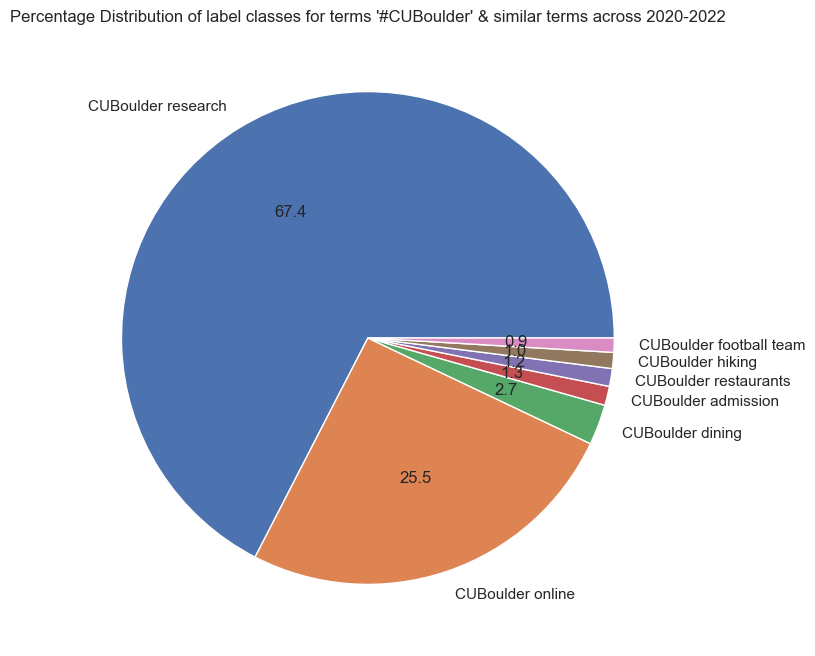

In [98]:
# label dist:

plt.figure(figsize=(10,8))
plt.pie(df['topic'].value_counts(normalize=True), labels = df.topic.value_counts().index.tolist(), autopct='%.1f')
plt.title("Percentage Distribution of label classes for terms '#CUBoulder' & similar terms across 2020-2022")

- Highly unbalanced for supervised algorithms


- As a workaround, we could consider three labels: `Research`, `Online_Study` and `Others` before performing sampling techniques since the remaining classes have a very low count.

Text(0.5, 1.0, 'Distribution of label classes')

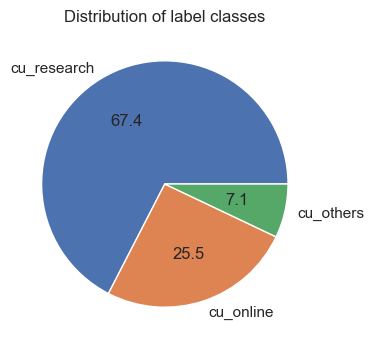

In [114]:
df_clean['label'] = df_clean['topic']\
                        .replace(['CUBoulder dining', 'CUBoulder admission', 'CUBoulder restaurants', 'CUBoulder hiking', 'CUBoulder football team'], 'cu_others')\
                        .replace('CUBoulder research', 'cu_research')\
                        .replace('CUBoulder online', 'cu_online')

plt.figure(figsize=(6,4))
plt.pie(df['label'].value_counts(normalize=True), labels = df.label.value_counts().index.tolist(), autopct='%.1f')
plt.title("Distribution of label classes")

### Column: `verifiedStatus`

In [31]:
# Distribution of 'verifiedStatus':

df.verifiedStatus.value_counts(normalize=True, dropna=False)*100.0

False    76.734694
True     23.265306
Name: verifiedStatus, dtype: float64

- So as a common concensus, being an educational insitution, not may influencers or people with verified status have been tweeting about CUB.


- About 77% users tweeting are not verified or belong to a verified entity. The other 24% could be attributed to renokwned researchers, scientists or sports personalities. Since it's an **educational institution**, it could be fair that majority of the users tweeting composes of students and staff members.



- No missing values.

#### Tracking the change in number of Verified Users over the years

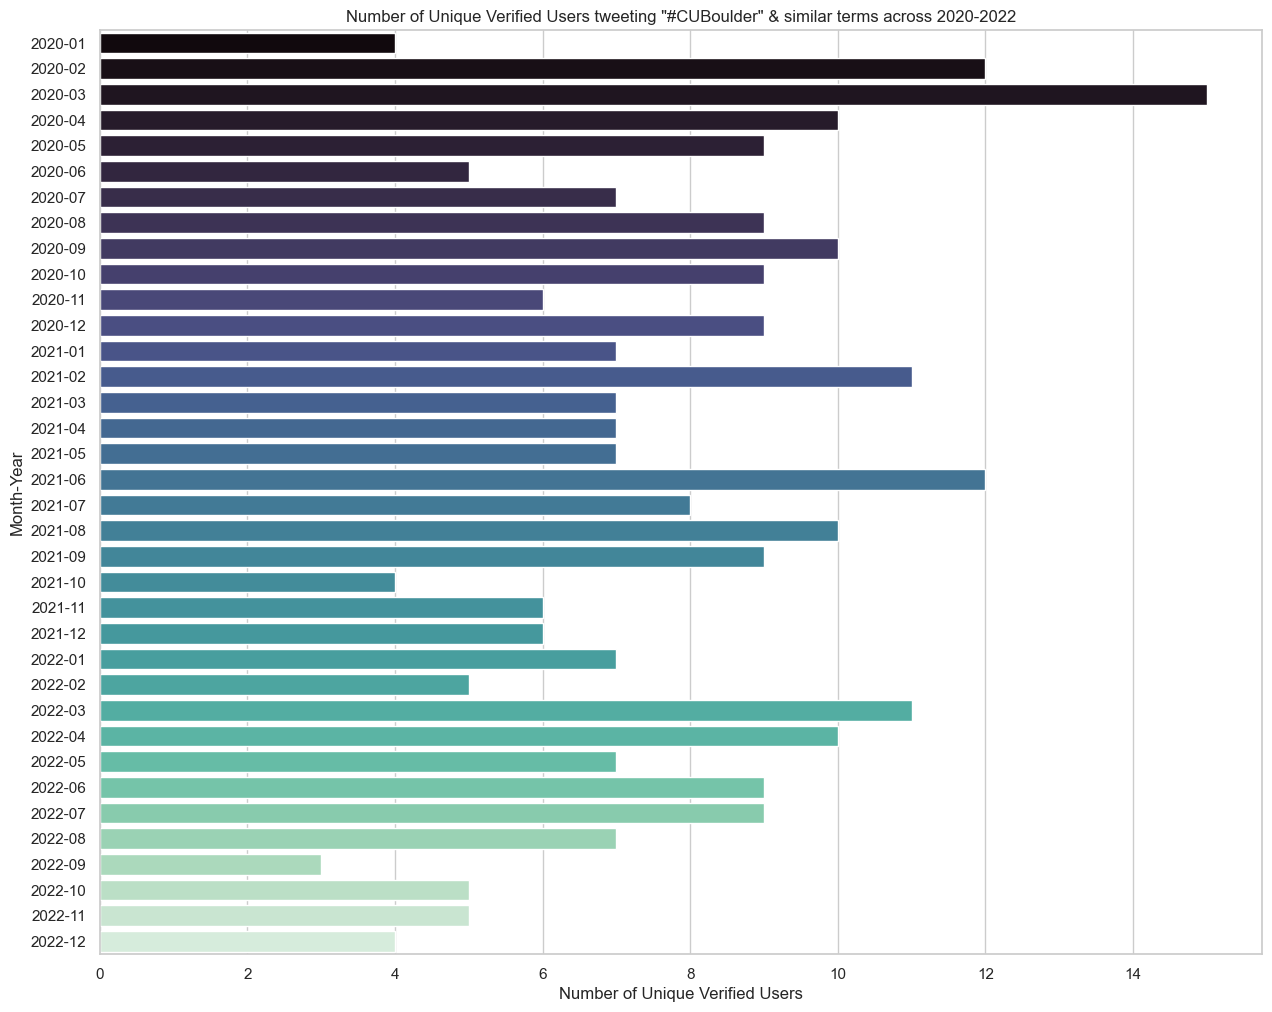

In [32]:
# A quick look into influencer tracking:

# Checking the change in number of Verified Users or verified tweets about CU Boulder over the years. 
# That is, over the years, how many unique verified users tweeted:

timestamp, non_verified, verified = [], [], []
for monthyr in df.dateMonthYear.unique():  
    counts = df[df.dateMonthYear == monthyr].drop_duplicates("username")['verifiedStatus'].value_counts()
    timestamp.append(monthyr)
    non_verified.append(counts[False]) 
    verified.append(counts[True])

# Active users with verified Status (blue tick) verifiedStatus tweeting '#CUBoulder' & similar 
# terms across 2020-2022
verify_dist = pd.DataFrame({"MonthYear": timestamp, 
                            "numNonVerified": non_verified, 
                            "numVerified": verified})

# Plotting change in number of unique Verified Users over the years 2020-2022:
plt.figure(figsize=(15,12))
sns.barplot(data=verify_dist, x='numVerified', y='MonthYear', palette = 'mako')
# ax = sns.lineplot(x='MonthYear', y='numVerified', data=verify_dist, lw = 3)
# ax = sns.lineplot(x='MonthYear', y='numNonVerified', data=verify_dist, lw = 2)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.title('Number of Unique Verified Users tweeting "#CUBoulder" & similar terms across 2020-2022')
plt.xlabel('Number of Unique Verified Users')
plt.ylabel('Month-Year')
plt.show()

- Over the years, the number of influencers and Official Public Handles tweeting using some of the terms related to CUBoulder such as Football, Basketball, Online, etc have reduced. This could be primarily due to the factor that most of the tweets belong to students and staff members, and since the hottest topic for the two years was "Research" it is common to expect this change. 


- Also there could be less activity from official public handles such as CUBoulder, CUEngineering, etc


- However, in the research wing, it could be plausible that not many recognized or verified researches have been tweeting over the two years.


- It would be much clearer when we visualize trending Hastags across the years

Text(0, 0.5, 'Verrified Twitter Handles')

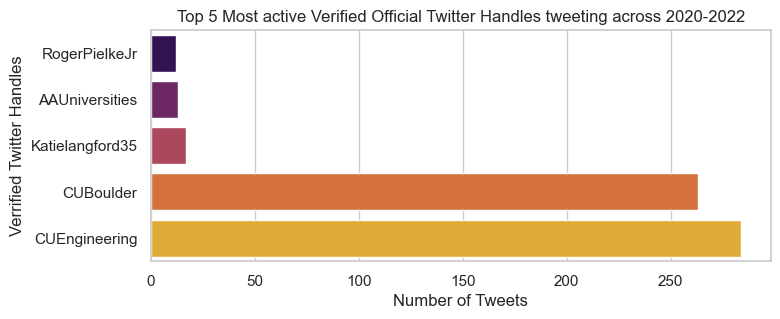

In [33]:
# Top 5 Most active Verified Users/Handles

plt.figure(figsize=(8,3))
sns.barplot(df[df.verifiedStatus==True].groupby('username')['tweet'].count().sort_values()[-5:].reset_index(), 
            x='tweet', y='username', palette = 'inferno')
plt.title('Top 5 Most active Verified Official Twitter Handles tweeting across 2020-2022')
plt.xlabel("Number of Tweets")
plt.ylabel("Verrified Twitter Handles")

### Columns: `retweetCount`, `likeCount`, `replyCount`

In [34]:
# Statistics for numerical features

num_distb = pd.concat([descriptive_stats(df['retweetCount']), 
                       descriptive_stats(df['likeCount']),
                       descriptive_stats(df['replyCount'])], axis=1)
num_distb.columns = ['retweetCount', 'likeCount', 'replyCount']
num_distb

,retweetCount,likeCount,replyCount
Variable type,<class 'numpy.int64'>,<class 'numpy.int64'>,<class 'numpy.int64'>
Num of records,3430,3430,3430
Unique count,37,93,16
Missing count,0,0,0
Missing %,0.0,0.0,0.0
Most common,0,0,0
Most common %,50.3207,19.650146,76.938776
Max,100,527,40
Min,0,0,0
mean,1.734985,7.361808,0.385714


- No missing values (though most of them seem to be zeros)


- Most of them seem to be skewed towards the lower values


- Good number of outliers are present in replyCount. Could be due to the "trending" tweets.


- Variance for likeCount looks interesting!

#### Skewness

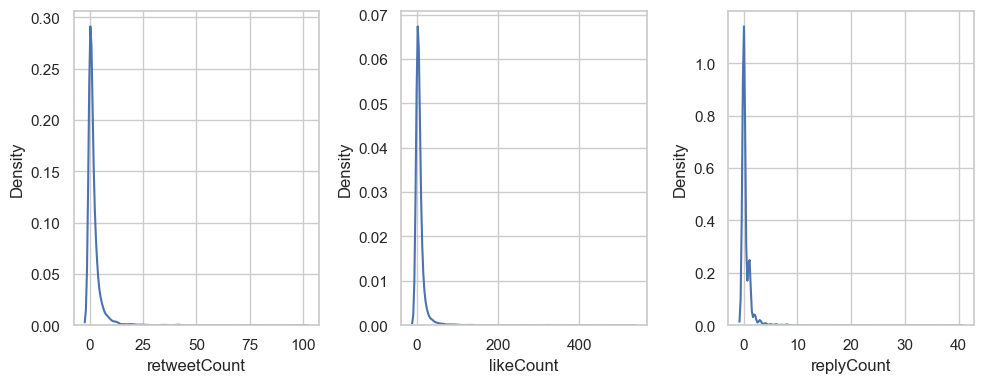

In [35]:
# Density Plots

figr, axs = plt.subplots(ncols=3, figsize=(10,4))
sns.kdeplot(df['retweetCount'], ax=axs[0], palette = 'mako')
sns.kdeplot(df['likeCount'], ax=axs[1], palette = 'mako')
sns.kdeplot(df['replyCount'], ax=axs[2], palette = 'mako')
figr.tight_layout()

- An obvious skewness towards the lower numbers owining to the fact discovered above in `verifiedStatus` that 77% of the tweeting users are not influencers, or famous personalities, leading to lesser reach. 


- A uncommon spike could be located in replyCount.

### Column: `username`  (aka Twitter Account)

#### Top 10 most Active users across the years 2020-2022

Text(0, 0.5, 'Number of Tweets')

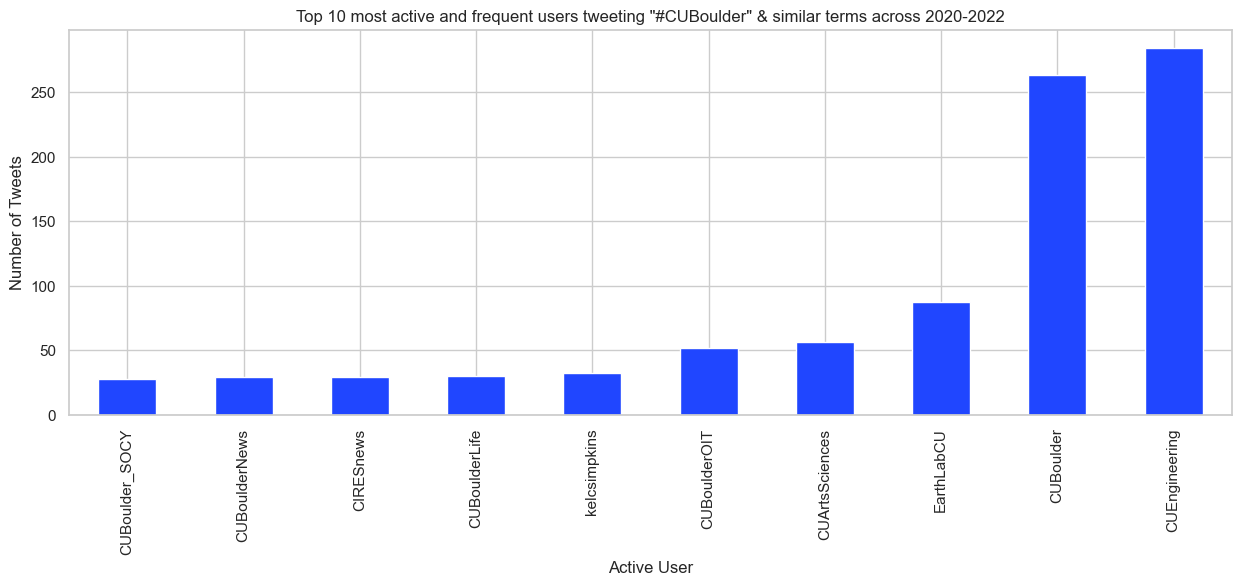

In [36]:
# Top 10 most active users across the years 2020-2022

usrplot = df.groupby("username")["tweet"].count().sort_values()[-10:].plot(kind='bar',figsize=(15, 5), color='#2046ff')
usrplot.set_title('Top 10 most active and frequent users tweeting "#CUBoulder" & similar terms across 2020-2022')
usrplot.set_xlabel('Active User')
usrplot.set_ylabel('Number of Tweets')

- `CUEngineering`, `CUBoulder` and `EarthLabCU` seems to be the most frequest domains tweeting during the considered timeline.


- **FACT: Out of the top three public handles, CUEngineering, CUBoulder have a verified status (Blue tick) but `EarthLabCU` does not, CU Team could look into this!**


- The first two could have been predicted, but it is interesting to note `Earth Lab at CU` being third most active domain during the two years.


- Could the tweets be about Covid-19 given the time-period of 2020-2022 considered?


- Are there some innovative ideas or recoginized researches happening in the Earth Lab?


#### Tracking top 10 most Popular Twitter Accounts: Potential influencers in making!

In [37]:
# Top 10 most "liked" or "retweeted" account/user users over the years


# :: Popularity Index ::

# total sum of likes and retweet counts
df['sum_LikeRetweet_Count'] = df['retweetCount'] + df['likeCount']

# For each user, number of tweets and sum of (likes and retweet counts)
popular_user = df.groupby('username')\
                .agg({'sum_LikeRetweet_Count': 'sum', 'tweet': 'count'})\
                .sort_values(by='sum_LikeRetweet_Count', ascending=False)\
                .reset_index()\
                .rename(columns={'tweet':'Number_of_Tweets'})

# Index of popularity (sum of likes + retweets) per 1 tweet:
popular_user['relative_popularity'] = popular_user['sum_LikeRetweet_Count']/popular_user['Number_of_Tweets']

# Popular users 
popular_user = popular_user.sort_values(by=['relative_popularity'], ascending=False).reset_index(drop=True)

# filtering out one-hit-wonders aka. viral users..
popular_user[popular_user['Number_of_Tweets'] > 5].reset_index(drop=True)[:10]

,username,sum_LikeRetweet_Count,Number_of_Tweets,relative_popularity
0,mitchellbyars,266,8,33.250000
1,ShellyMBoulder,327,11,29.727273
2,CUToddSaliman,622,27,23.037037
3,sfiscience,275,12,22.916667
4,CUBoulderENVS,271,14,19.357143
5,queenofpeat,327,18,18.166667
6,NREL,120,7,17.142857
7,maxboykoff,152,9,16.888889
8,CUAnschutz,116,7,16.571429
9,OGG_CUBoulder,298,18,16.555556


Text(0.5, 1.0, 'Top 10 most popular Twitter accounts across 2020-2022')

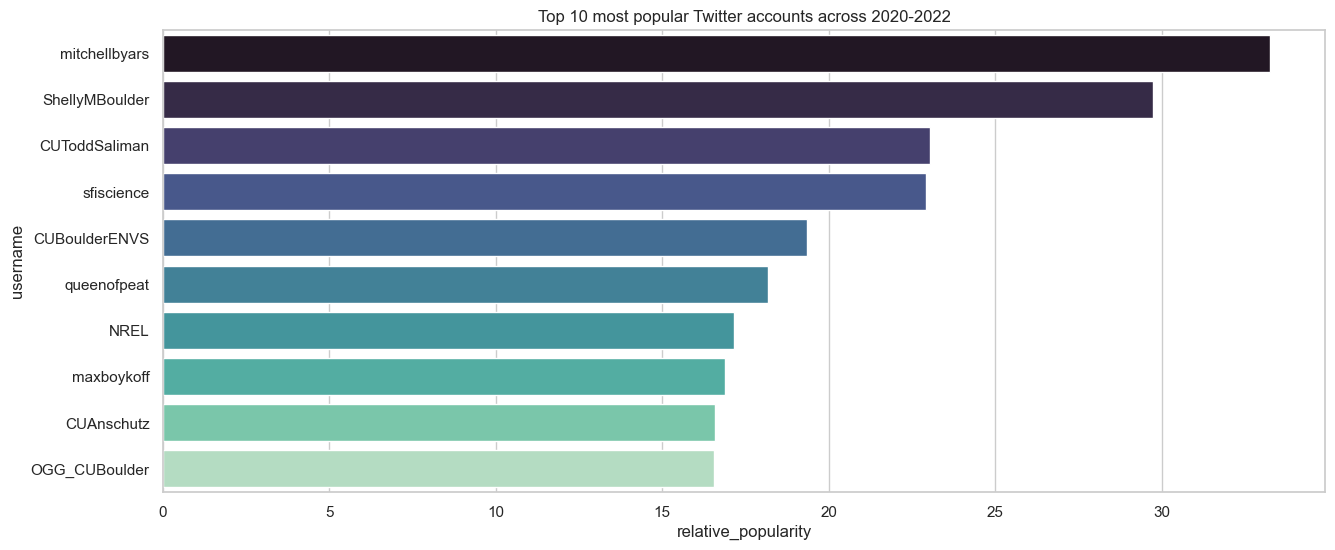

In [38]:
# Popular users 

plt.figure(figsize=(15,6))
sns.barplot(popular_user[popular_user['Number_of_Tweets'] > 5].reset_index(drop=True)[:10], 
            x='relative_popularity', 
            y='username', palette = 'mako')
plt.title('Top 10 most popular Twitter accounts across 2020-2022')

- These are top twitter users having the most reach and could be tracked as potential key influencers in a more generic sense.


- Users such as `Mitchellbyars` and `ShellyMBoulder` seems to have a good following and their each tweet reaches about 33 people, which infact is great when compared to small active user-base.

### Column: `tweet`

In [39]:
def get_word_freq(data_col, t):
    # get countVectorizer word frequency
    count = CountVectorizer()
    count_matrix = count.fit_transform(data_col)
    words = np.array(count.get_feature_names_out())
    word_count = np.array(np.sum(count_matrix, axis=0)).reshape((-1,))
    word_freq = pd.DataFrame({"word": words, "count": word_count})\
                    .sort_values(by='count', ascending=False)\
                    .head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(word_freq, x='word', y='count', palette = 'mako')
    plt.title(t)
    return

#### Most Common Words (before preprocessing)

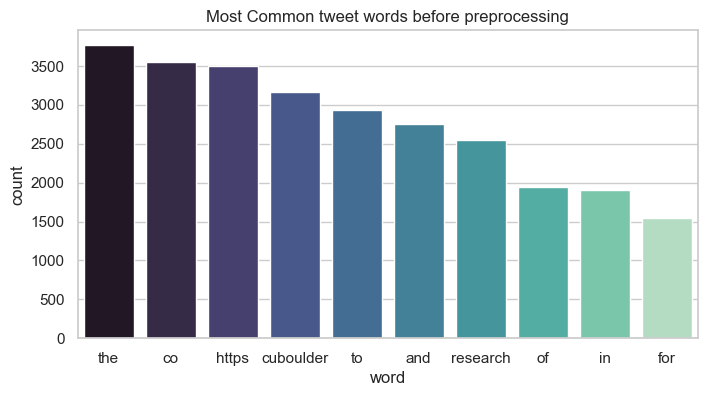

In [40]:
get_word_freq(df.tweet, "Most Common tweet words before preprocessing")

#### Most Popular tweets across the years

In [41]:
# Most popular tweets across the years

pop_tweets = df.sort_values(by=['sum_LikeRetweet_Count'], ascending=False)[['date', 'tweet', 'username', 'topic', 'sum_LikeRetweet_Count']].reset_index(drop=True)
pop_tweets[:10]

,date,tweet,username,topic,sum_LikeRetweet_Count
0,2022-12-09,Coach Prime meeting the Colorado Football Team...,ThaddBoii,CUBoulder football team,627
1,2020-10-07,Congratulations to #CUBoulder alumna Jennifer ...,CUBoulder,CUBoulder research,443
2,2021-05-01,Field courses and outreach are my passions and...,Dr_Scott_Taylor,CUBoulder research,423
3,2021-07-22,We’re excited to see how this will enable and ...,DeepMind,CUBoulder research,360
4,2021-11-18,I’m an Assistant Professor in the ecology and ...,Dr_Scott_Taylor,CUBoulder research,344
5,2020-07-16,#1 public university for @NASA funding in rese...,CUBoulder,CUBoulder research,294
6,2020-06-03,@CUBuffs @ScottN10 @coochiemeat @muzzeltov @CU...,lmaogm,CUBoulder admission,262
7,2022-09-09,Thrilled to join the Department of Geography a...,jessica_finlay,CUBoulder research,213
8,2022-05-07,Governor @jaredpolis stopped by to take one la...,CUBoulder,CUBoulder admission,188
9,2020-01-19,"OK, Doomer. Research shows doomsday language d...",CUBoulder,CUBoulder research,185


- Due to being contextually aware, **Coach Prime Deion Sanders joining CUBuffs Football team** was infact a big news. And heres the proof!


- Intrestinlgy enough, the most popular tweets across 2020 to 2022 were attributed to the `research` topic.


- User `ThaddBoii` was not infact tracked as a potential influencer in the making since, the user posted just 1 tweet. Similar viral tweets were ignored for tracking potential influencers. (Snapshot below)

In [42]:
# Why user `ThaddBoii` was not tracked as a potential influencer:

popular_user[:3]

,username,sum_LikeRetweet_Count,Number_of_Tweets,relative_popularity
0,ThaddBoii,627,1,627.0
1,DeepMind,360,1,360.0
2,Dr_Scott_Taylor,792,3,264.0


- Most of the viral tweeting user accounts posted less than 5 tweets (a threshold assumed for being a popular twitter account)

In [43]:
print("Most Popular Tweet anchored to '@CUBoulder' acorss 2020-2022 was:\n\n", pop_tweets['tweet'][0])

Most Popular Tweet anchored to '@CUBoulder' acorss 2020-2022 was:

 Coach Prime meeting the Colorado Football Team for the first time🤣🤣🦬🔥🐐 @DeionSanders @CUBoulder @CUBuffsFootball #coachprime #deionsanders #coloradobuffaloes #coloradofootball #thaddboii #skobuffs https://t.co/mpygMENWgT


#### Top 2 most popular tweets for each of the label-class (topic)

In [44]:
# using "RANK" method:

perTopic_Rank = pop_tweets[pop_tweets.groupby("topic")["sum_LikeRetweet_Count"].rank(ascending=False) < 3].sort_values(by=['topic', 'sum_LikeRetweet_Count'], ascending=[True, False])
setTopic, c = "", 1
for _, row in perTopic_Rank.iterrows():
    if row['topic'] != setTopic:
        setTopic, c = row['topic'], 1
        print('----'*20, '\n\nTOP 2 TWEETS FOR TOPIC:  "{}"\n'.format(setTopic))
    print("\n> #", c, " ", row['tweet'])
    c+=1

-------------------------------------------------------------------------------- 

TOP 2 TWEETS FOR TOPIC:  "CUBoulder admission"


> # 1   @CUBuffs @ScottN10 @coochiemeat @muzzeltov @CUBoulder nah fam we need her admission REVOKED. racism should never even step close to your values.

> # 2   Governor @jaredpolis stopped by to take one last selfie with the Triceratops before it heads home to the @smithsonian on May 9th. 

You still have time to come bid farewell! The CU Museum will be open today and tomorrow. Admission is free.

Learn more ➡ https://t.co/BunWm42lkZ https://t.co/9Sewl3sgZD
-------------------------------------------------------------------------------- 

TOP 2 TWEETS FOR TOPIC:  "CUBoulder dining"


> # 1   Buffs, the fall semester will look different, and we want to share what you should expect as you navigate the changes. From what you will need to do each day of class, types of classes, dining options on campus and transportation changes. https://t.co/xNSgFE9hmp http

### Column: `hastags`

#### Top 10 trending Twitter HashTags

Text(0.5, 1.0, "Top 10 trending 'Hastags' used across 2020-2022")

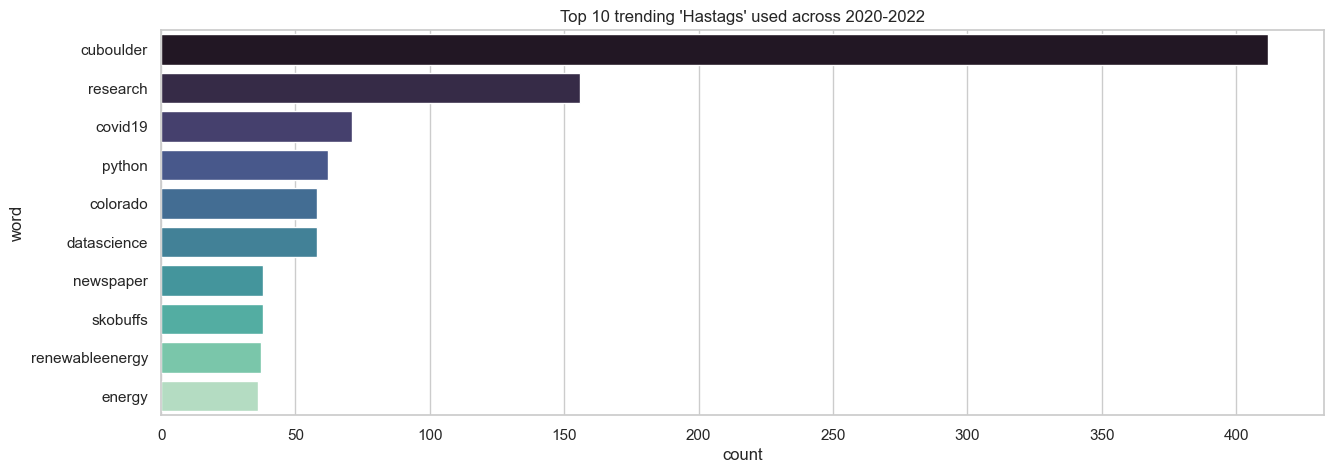

In [45]:
# Top 10 trending Twitter HashTags

count = CountVectorizer()
count_matrix = count.fit_transform(sum(df[df['hastags'].isna()==False]['hastags'].tolist(), []))
words = np.array(count.get_feature_names_out())
word_count = np.array(np.sum(count_matrix, axis=0)).reshape((-1,))
word_freq = pd.DataFrame({"word": words, "count": word_count}).sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(word_freq, y='word', x='count', palette = 'mako')
plt.title("Top 10 trending 'Hastags' used across 2020-2022")

- `Research`, `Covid19` and intrestingly `Python` are some of the most common trending hastags used.

----

## 6. Bivariate Analysis

##### Pearson's Correlation Heatmap

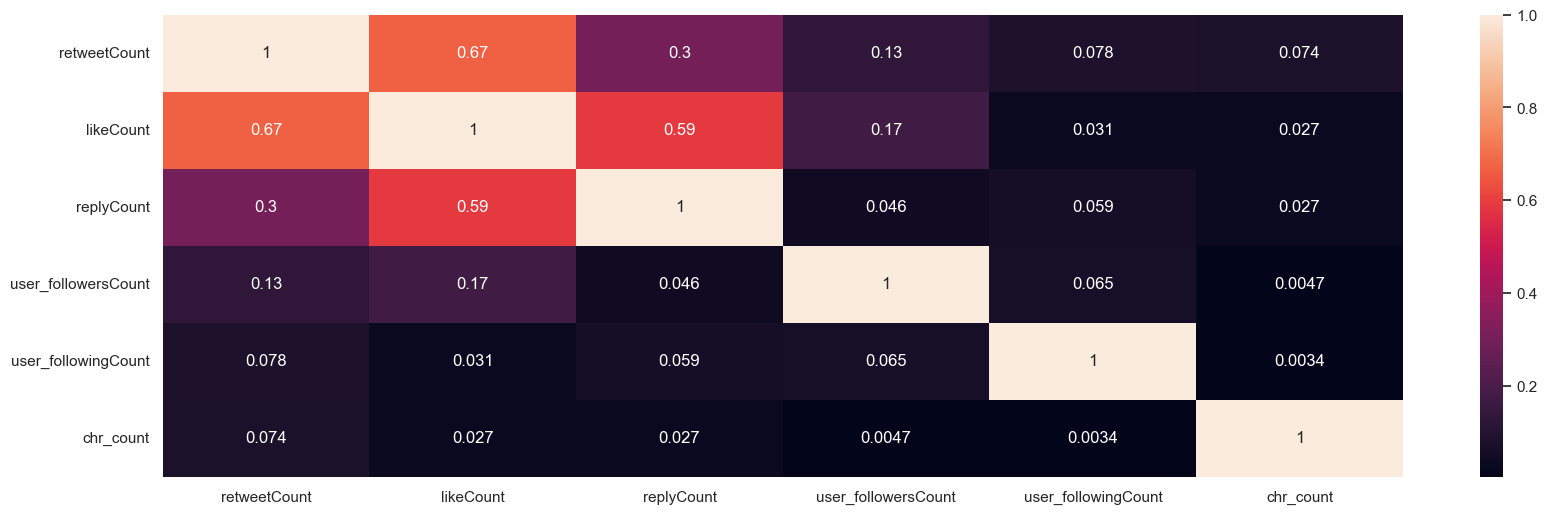

In [46]:
# let's start with correlation heatmap for contiuous quantitative features

fig, ax = plt.subplots(figsize=(20,6))
sns.heatmap(df.drop(columns=['sum_LikeRetweet_Count', 'verifiedStatus']).corr(), annot=True)
plt.show()

- As expected, Like-Count, Reply-Count, and Retweet-Count are quite correlated 
- Contrast to common belief, User-Followers-Count is not at all correlated to the above three insights.

#### Response statistics

Text(0, 0.5, 'Density')

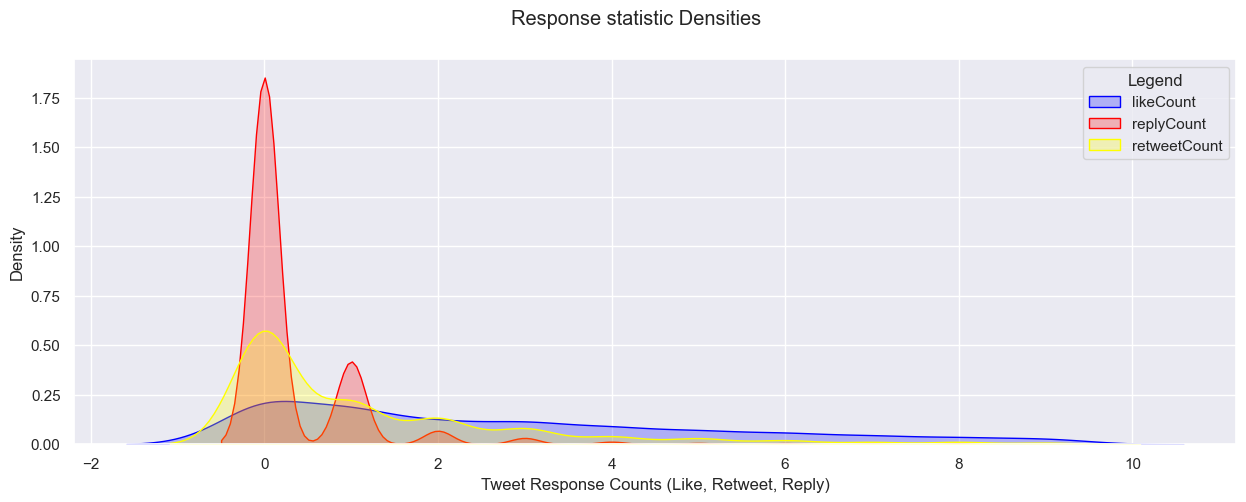

In [47]:
sns.set(rc={'figure.figsize':(15,5)})
fig, ax = plt.subplots()
sns.kdeplot(df[df["likeCount"]<10]['likeCount'], color="blue", shade=True, ax=ax)
sns.kdeplot(df[df["replyCount"]<10]['replyCount'], color="red", shade=True, ax=ax)
sns.kdeplot(df[df["retweetCount"]<10]['retweetCount'], color="yellow", shade=True, ax=ax)
fig.suptitle("Response statistic Densities")
plt.legend(title='Legend', labels=['likeCount', 'replyCount', 'retweetCount'])
ax.set_xlabel("Tweet Response Counts (Like, Retweet, Reply)")
ax.set_ylabel("Density")

#### Twitter User Stats (Followers, People Following)

In [48]:
df['user_followersCount'].mean()

15920.260641399416

Text(0, 0.5, 'Density')

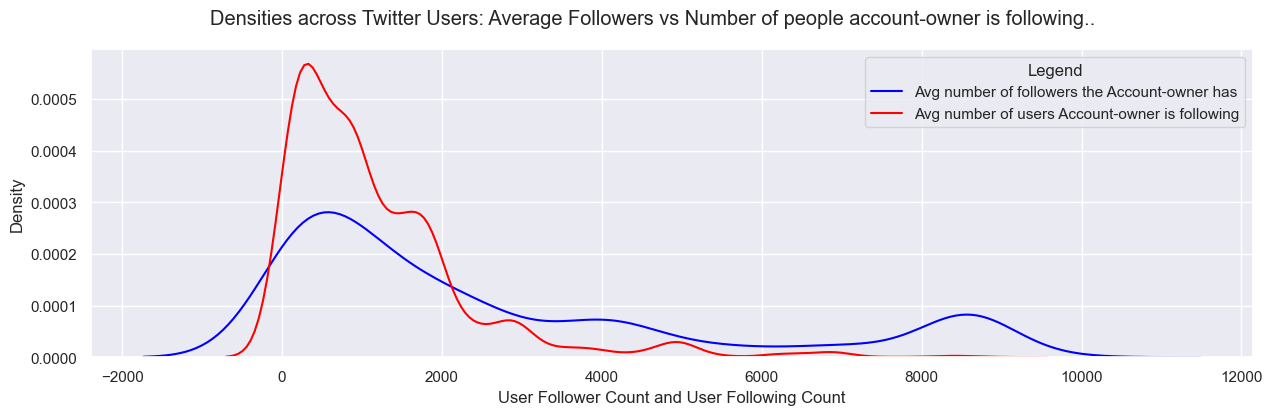

In [49]:
sns.set(rc={'figure.figsize':(15,4)})
fig, ax = plt.subplots()
sns.kdeplot(df[df['user_followersCount']<10000]['user_followersCount'], color="blue", shade=False, ax=ax)
sns.kdeplot(df[df['user_followingCount']<10000]['user_followingCount'], color="red", shade=False, ax=ax)
fig.suptitle("Densities across Twitter Users: Average Followers vs Number of people account-owner is following..")
plt.legend(title='Legend', labels=['Avg number of followers the Account-owner has', 'Avg number of users Account-owner is following'])
ax.set_xlabel("User Follower Count and User Following Count")
ax.set_ylabel("Density")

- The average number of followers (following account-owners) is more wide-spread (bi-modal) and possibly counts for famous personalities.


- The average number of people these twitter account-owners are following represent a more expected normal distribution (skewed) curve, since some handles would be following a lot more people as compared to few reserved handles.

### Timeline Stats

#### Timeline (2020-2022) vs Tweets Count:

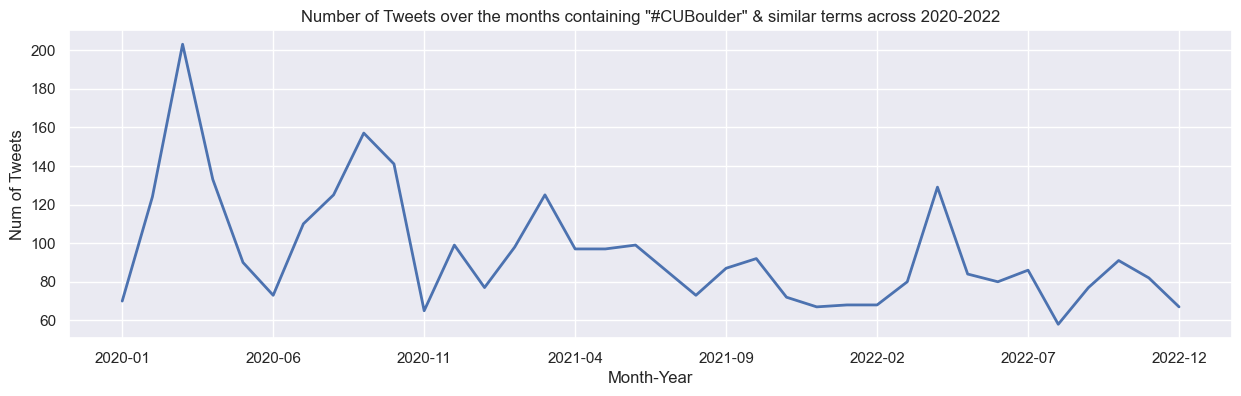

In [50]:
# Tweet Count

plt.figure(figsize=(15,4))
ax = sns.lineplot(x='dateMonthYear', y='tweet', data=df_monthly, lw = 2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.title('Number of Tweets over the months containing "#CUBoulder" & similar terms across 2020-2022')
plt.ylabel('Num of Tweets')
plt.xlabel('Month-Year')
plt.show()

#### Timeline (2020-2022) vs Retweets Count:

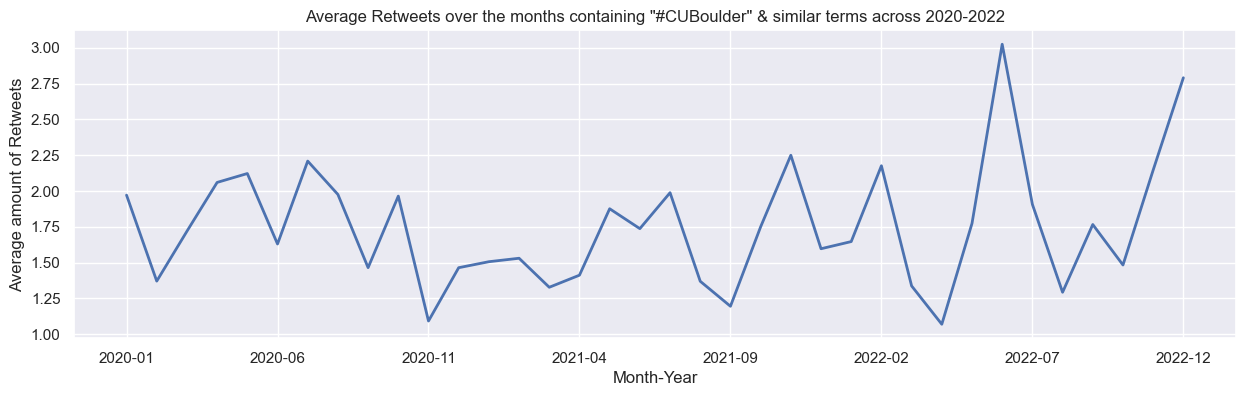

In [51]:
# Average Retweets Count

plt.figure(figsize=(15,4))
ax = sns.lineplot(x='dateMonthYear', y='retweetCount', data=df_monthly, lw = 2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.title('Average Retweets over the months containing "#CUBoulder" & similar terms across 2020-2022')
plt.ylabel('Average amount of Retweets')
plt.xlabel('Month-Year')
plt.show()

#### Timeline (2020-2022) vs Likes Count:

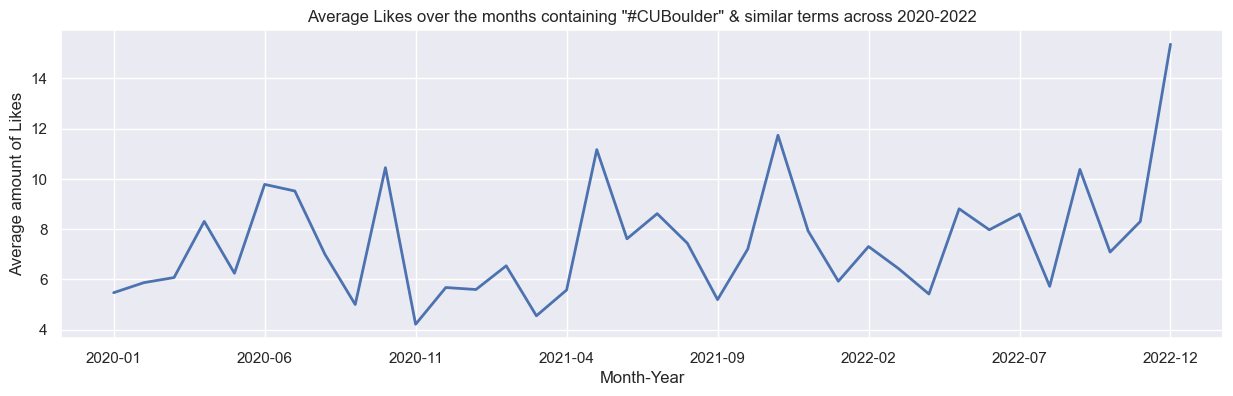

In [52]:
# Average Likes Count

plt.figure(figsize=(15,4))
ax = sns.lineplot(x='dateMonthYear', y='likeCount', data=df_monthly, lw = 2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.title('Average Likes over the months containing "#CUBoulder" & similar terms across 2020-2022')
plt.ylabel('Average amount of Likes')
plt.xlabel('Month-Year')
plt.show()

- Surprisngly, the number of tweets have gone down over the years. However, the nnumber of retweets, likes have tenfolded. It could be due to recent events such as CUBuff Football team's poor performance ad onbaording of Coach Prime Deion Sanders (as of Jan 2023).


- Events like transfers, ground-breaking research, alerts could polarize sentiments. We shall be deep diving into its details to figure out the trending terms during these spikes, and correlate information.

----

## 7. Missing Value Detection and treatment

In [53]:
print("Missing Values for each Feature Set:")
for col in df.columns:
    print(">", col, "=", df[col].isna().sum())

Missing Values for each Feature Set:
> date = 0
> dateDay = 0
> dateMonth = 0
> dateMonthYear = 0
> dateYear = 0
> tweet = 0
> lang = 0
> retweetCount = 0
> likeCount = 0
> replyCount = 0
> username = 0
> user_followersCount = 0
> user_followingCount = 0
> verifiedStatus = 0
> tweet_url = 0
> hastags = 1867
> chr_count = 0
> topic = 0
> sum_LikeRetweet_Count = 0


- Only Hastags have a lot of missing values and it's common to expect this, since not all tweets would contain a particular hastag, but atleast an anchor text.


- We have already replaced the 'nan', or 'null' values with an object `None`


- Since a lot of tweets are missing hashtags, it's okay to keep them intact.

----

## Preprocessing

Owning to EDA we found a lost of insights, relations, and statistics which has helped build this text preprocessing pipeline. 

We also performed a word frequency visualization to see what words are being used the most by the dataset to better preprocess the data and prevent working in too much granularity.

In [104]:
class preprocessText:
    
    def __init__(self, resources_dir_path, custom_vocab=[], MIN_TOKENS=5, MAX_TOKENS=1000000, do_lemma=False):
        self.stopwords_file = os.path.join(resources_dir_path, "stopwords.txt")
        self.special_stopwords_file = os.path.join(resources_dir_path, "special_stopwords.txt")
        self.special_characters_file = os.path.join(resources_dir_path, "special_characters.txt")
        self.contractions_file = os.path.join(resources_dir_path, "contractions.json")
        self.chatwords_file = os.path.join(resources_dir_path, "chatwords.txt")
        self.emoticons_file = os.path.join(resources_dir_path, "emoticons.json")
        self.greeting_file = os.path.join(resources_dir_path, "greeting_words.txt")
        self.signature_file = os.path.join(resources_dir_path, "signature_words.txt")
        self.preserve_key = "<$>" # preserve special vocab
        self.vocab_list = custom_vocab
        self.preseve = True if len(custom_vocab) > 0 else False
        self.load_resources()
        self.do_lemma = do_lemma
        self.lang = []
        self.min_tokens = MIN_TOKENS
        self.max_tokens = MAX_TOKENS
        return
    
    def load_resources(self):
        
        ### Build Vocab Model --> Words to keep
        self.vocab_list = set(map(str.lower, self.vocab_list))
        self.vocab_dict = {w: self.preserve_key.join(w.split()) for w in self.vocab_list}
        self.re_retain_words = re.compile('|'.join(sorted(map(re.escape, self.vocab_dict), key=len, reverse=True)))
        
        ### Build Stopwords Model --> Words to drop/delete
        with open(self.stopwords_file, 'r', encoding='utf-8', errors='ignore') as f:
            self.stopwords = [x.rstrip() for x in f.readlines()]
        with open(self.special_stopwords_file, 'r', encoding='utf-8', errors='ignore') as f:
            self.stopwords.extend([x.rstrip() for x in f.readlines()])
        with open(self.special_characters_file, 'r', encoding='utf-8', errors='ignore') as f:
            self.stopwords.extend([x.rstrip() for x in f.readlines()])
        self.stopwords = list(sorted(set(self.stopwords).difference(self.vocab_list)))

        ### Build Contractions
        with open(self.contractions_file, 'r', encoding='utf-8', errors='ignore') as f:
            self.contractions = dict(json.load(f))
        
        ### Build Chat-words
        with open(self.chatwords_file, 'r', encoding='utf-8', errors='ignore') as f:
            self.chat_words_map_dict, self.chat_words_list = {}, []
            chat_words = [x.rstrip() for x in f.readlines()]
            for line in chat_words:
                cw = line.split("=")[0]
                cw_expanded = line.split("=")[1]
                self.chat_words_list.append(cw)
                self.chat_words_map_dict[cw] = cw_expanded
            self.chat_words_list = set(self.chat_words_list)
        
        ### Bukd social markups
        
        # Emoticons
        with open(self.emoticons_file, "r") as f:
            self.emoticons = re.compile(u'(' + u'|'.join(k for k in json.load(f)) + u')')
        
        # Emojis
        self.emojis = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        
        # Greeting
        with open(self.greeting_file, 'r', encoding='utf-8', errors='ignore') as f:
            self.greeting_words = [x.rstrip() for x in f.readlines()]
        
        # Signature
        with open(self.signature_file, 'r', encoding='utf-8', errors='ignore') as f:
            self.signature_words = [x.rstrip() for x in f.readlines()]
        
        # Spell-corrector (takes too long!)
        self.spell_checker = SpellChecker()   
        return
    
    
    def reserve_keywords_from_cleaning(self, text, reset=False):
        """ 
        Finds common words from a user-provided list of special keywords to preserve them from 
        cleaning steps. Identifies every special keyword and joins them using `self.preserve_key` during the 
        cleaning steps, and later resets it back to original word in the end.
        """
        if reset is False:
            # compile using a dict of words and their expansions, and sub them if found!
            match_and_sub = self.re_retain_words.sub(lambda x: self.vocab_dict[x.string[x.start():x.end()]], text)
            return re.sub(r"([\s\n\t\r]+)", " ", match_and_sub).strip()
        else:
            # reverse the change! - use this at the end of preprocessing
            text = text.replace(self.preserve_key, " ")
            return re.sub(r"([\s\n\t\r]+)", " ", text).strip()


    def basic_clean(self, input_sentences):
        cleaned_sentences = []
        for sent in tqdm.tqdm(input_sentences):
            # lowercasing
            sent = str(sent).strip().lower()
            # FIX text
            sent = ftfy.fix_text(sent)
            # Normalize accented chars
            sent = unicodedata.normalize('NFKD', sent).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            # Removing <…> web scrape tags
            sent = re.sub(r"\<(.*?)\>", " ", sent)
            # Expanding contractions using contractions_file
            sent = re.sub(r"(\w+\'\w+)", lambda x: self.contractions.get(x.group().lower(), x.group().lower()), sent)
            # Removing web urls
            sent = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0–9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»""'']))''', " ", sent)
            # Removing date formats
            sent = re.sub(r"(\d{4}\-\d{2}\-\d{2}\s\d{2}\:\d{2}\:\d{2}\s\:)", " ", sent)
            # Removing extra whitespaces
            sent = re.sub(r"([\s\n\t\r]+)", " ", sent).strip()
            cleaned_sentences.append(sent)
        return cleaned_sentences


    def deep_clean(self, input_sentences):
        cleaned_sentences = []
        for sent in tqdm.tqdm(input_sentences):
            # normalize text to "utf-8" encoding
            sent = unicodedata.normalize('NFKD', str(sent)).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            # lowercasing
            sent = str(sent).strip().lower()

            # <--------------------------------------------------------------------------- >
            # <----------------------------- CUSTOM CLEANING ----------------------------- >
            # <--------------------------------------------------------------------------- >
            #
            # *** Mark important keywords such as: Domain specific, Question words(wh-words), etc, using 
            # "self.vocab_list". Words from this list if found in any input sentence shall be joined using 
            # a key (self.preserve_key) during pre-processing step, and later un-joined to retain them.
            #
            # TWITTER SPECIFIC
            # ----------------
            twitter_anchor_re = "(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)"
            sent = re.sub(r"{}".format(twitter_anchor_re), " ", sent)
            
            if self.preseve: 
                sent = self.reserve_keywords_from_cleaning(sent, reset=False)
                
            # Tokenizing with NLTK's TweetTokenizer (limiting repeated characters to 3 with the reduce lens
            # paramater and strips all the @'s. It also splits it into 1-gram tokens
            tweetToknzr = TweetTokenizer(strip_handles = True, reduce_len = True)
            sent = " ".join(tweetToknzr.tokenize(sent))
            
            # Remove prefix of hastags (#) 
            sent = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", sent).split())
            #
            #
            # <--------------------------------------------------------------------------- >
            # <----------------------------- CUSTOM CLEANING ----------------------------- >
            # <--------------------------------------------------------------------------- >

            # remove Emojis 😜 🔥🔥
            sent = self.emojis.sub(r'', sent)
            # remove Emoticons ( ͡❛ ͜ʖ ͡❛)
            sent = self.emoticons.sub(r'', sent)
            # remove common chat-words
            sent = " ".join([self.chat_words_map_dict[w.upper()] if w.upper() in self.chat_words_list else w for w in sent.split()])
            # FIX text
            sent = ftfy.fix_text(sent)
            # Normalize accented chars
            sent = unicodedata.normalize('NFKD', sent).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            # Removing <…> web scrape tags
            sent = re.sub(r"\<(.*?)\>", " ", sent)
            # Removing web-links
            sent = " ".join([re.sub(r'^https?:\/\/.*[\r\n]*', '', token.strip(), flags=re.MULTILINE) for token in sent.split()])
            # Expanding contractions using contractions_file
            sent = re.sub(r"(\w+\'\w+)", lambda x: self.contractions.get(x.group().lower(), x.group().lower()), sent)
            # Removing web urls
            sent = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0–9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»""'']))''', " ", sent)
            # Removing date formats
            sent = re.sub(r"(\d{4}\-\d{2}\-\d{2}\s\d{2}\:\d{2}\:\d{2}\s\:)", " ", sent)

            # sentence language detection ('en', 'fr', 'gr', etc)
            lang = nlp(sent)._.language['language']
            self.lang.append(lang)

            # <--------------------------------------------------------------------------- >
            # <----------------------------- OPTIONAL CLEANING ----------------------------- >
            # <--------------------------------------------------------------------------- >
            #
            # removing punctuations 
            # *** disable them, when sentence structure needs to be retained ***
            sent = re.sub(r"[\$|\#\@\*\%]+\d+[\$|\#\@\*\%]+", " ", sent)
            sent = re.sub(r"\'s", " \'s", sent)
            sent = re.sub(r"\'ve", " \'ve", sent)
            sent = re.sub(r"n\'t", " n\'t", sent)
            sent = re.sub(r"\'re", " \'re", sent)
            sent = re.sub(r"\'d", " \'d", sent)
            sent = re.sub(r"\'ll", " \'ll", sent)
            sent = re.sub(r"[\/,\@,\#,\\,\{,\},\(,\),\[,\],\$,\%,\^,\&,\*,\<,\>]", " ", sent)
            sent = re.sub(r"[\,,\;,\:,\-]", " ", sent)      # main puncts
            
            # remove sentence de-limitters 🔥🔥
            # *** disable them, when sentence boundary/ending is important ***
            # sent = re.sub(r"[\!,\?,\.]", " ", sent)

            # keep only text & numbers 🔥🔥
            # *** enable them, when only text and numbers matter! *** 
            # sent = re.sub(r"\s+", " ", re.sub(r"[\\|\/|\||\{|\}|\[|\]\(|\)]+", " ", re.sub(r"[^A-z0-9]", " ", str(sent))))
            
            # correct spelling mistakes 🔥🔥
            # *** TAKES TOO LONG! enable them when english spelling mistakes matter *** 
            # sent = " ".join([self.spell_checker.correction(w) if w in self.spell_checker.unknown(sent.split()) else w for w in sent.split()])
            
            # Limit Min - Max Token Length
            sent = "" if len(sent.split()) > self.max_tokens or len(sent) <= self.min_tokens else sent
            #
            # <--------------------------------------------------------------------------- >
            # <----------------------------- OPTIONAL CLEANING ----------------------------- >
            # <--------------------------------------------------------------------------- >
            
            # Remove stopwords
            sent = " ".join(token.text for token in nlp(sent) if token.text not in self.stopwords and token.lemma_ not in self.stopwords)
            # Lemmatize
            if self.do_lemma:
                sent = " ".join(token.lemma_ for token in nlp(sent))
            # Removing extra whitespaces
            sent = re.sub(r"([\s\n\t\r]+)", " ", sent).lower().strip()

            # <----------------------------- CUSTOM CLEANING ----------------------------- >
            #
            # *** Reverse the custom joining now to un-join the special words found!
            if self.preseve: 
                sent = self.reserve_keywords_from_cleaning(sent, reset=True)
            #
            # <----------------------------- CUSTOM CLEANING ----------------------------- >

            cleaned_sentences.append(sent.strip().lower())
        return cleaned_sentences


    def spacy_get_pos_list(self, results):
        word_list, pos_list, lemma_list, ner_list, start_end_list = [], [], [], [], []
        indices = results['sentences']
        for line in indices:
            tokens = line['tokens']
            for token in tokens:
                # (1). save tokens
                word_list.append(token['word'])
                # (2). save pos
                pos_list.append(token['pos'])
                # (3). save lemmas
                lemma = token['lemma'].lower()
                if lemma in self.stopwords: continue
                lemma_list.append(lemma)
                # (4). save NER
                ner_list.append(token['ner'])
                # (5). save start
                start_end_list.append(str(token['characterOffsetBegin']) + "_" + str(token['characterOffsetEnd']))
        output = {"word_list": word_list, 
                  "lemma_list": lemma_list, 
                  "token_start_end_list": start_end_list,
                  "pos_list": pos_list, "ner_list": ner_list}
        return output

    def spacy_generate_features(self, doc, operations='tokenize,ssplit,pos,lemma,ner'):
        """
        Spacy nlp pipeline to generate features such as pos, tokens, ner, dependency. Accepts doc=nlp(text)
        """
        # spacy doc
        doc_json = doc.to_json()  # Includes all operations given by spacy pipeline

        # Get text
        text = doc_json['text']

        # ---------------------------------------- OPERATIONS  ---------------------------------------- #
        # 1. Extract Entity List
        entity_list = doc_json["ents"]

        # 2. Create token lib
        token_lib = {token["id"]: token for token in doc_json["tokens"]}

        # init output json
        output_json = {}
        output_json["sentences"] = []

        # Perform spacy operations on each sent in text
        for i, sentence in enumerate(doc_json["sents"]):
            # init parsers
            parse = ""
            basicDependencies = []
            enhancedDependencies = []
            enhancedPlusPlusDependencies = []

            # init output json
            out_sentence = {"index": i, "line": 1, "tokens": []}
            output_json["sentences"].append(out_sentence)

            # 3. Split sentences by indices(i), add labels (pos, ner, dep, etc.)
            for token in doc_json["tokens"]:

                if sentence["start"] <= token["start"] and token["end"] <= sentence["end"]:
                    
                    # >>> Extract Entity label
                    ner = "O"
                    for entity in entity_list:
                        if entity["start"] <= token["start"] and token["end"] <= entity["end"]:
                            ner = entity["label"]

                    # >>> Extract dependency info
                    dep = token["dep"]
                    governor = 0 if token["head"] == token["id"] else (token["head"] + 1)  # CoreNLP index = pipeline index +1
                    governorGloss = "ROOT" if token["head"] == token["id"] else text[token_lib[token["head"]]["start"]:
                                                                                     token_lib[token["head"]]["end"]]
                    dependent = token["id"] + 1
                    dependentGloss = text[token["start"]:token["end"]]

                    # >>> Extract lemma
                    lemma = doc[token["id"]].lemma_

                    # 4. Add dependencies
                    basicDependencies.append({"dep": dep,
                                              "governor": governor,
                                              "governorGloss": governorGloss,
                                              "dependent": dependent,
                                              "dependentGloss": dependentGloss})
                    # 5. Add tokens
                    out_token = {"index": token["id"] + 1,
                                 "word": dependentGloss,
                                 "originalText": dependentGloss,
                                 "characterOffsetBegin": token["start"],
                                 "characterOffsetEnd": token["end"]}

                    # 6. Add lemmas
                    if "lemma" in operations:
                        out_token["lemma"] = lemma

                    # 7. Add POS tagging
                    if "pos" in operations:
                        out_token["pos"] = token["tag"]

                    # 8. Add NER
                    if "ner" in operations:
                        out_token["ner"] = ner

                    # Update output json
                    out_sentence["tokens"].append(out_token)

            # 9. Add dependencies operation
            if "parse" in operations:
                out_sentence["parse"] = parse
                out_sentence["basicDependencies"] = basicDependencies
                out_sentence["enhancedDependencies"] = out_sentence["basicDependencies"]
                out_sentence["enhancedPlusPlusDependencies"] = out_sentence["basicDependencies"]
        # ---------------------------------------- OPERATIONS  ---------------------------------------- #
        return output_json
    
    def spacy_clean(self, input_sentences):
        batch_size = min(int(np.ceil(len(input_sentences)/100)), 500)
        
        # Part 1: generate spacy textual features (pos, ner, lemma, dependencies)
        sentences = [self.spacy_generate_features(doc) for doc in nlp.pipe(input_sentences, batch_size=batch_size, n_process=-1)]
        
        # Part 2: collect all the features for each sentence
        spacy_sentences = [self.spacy_get_pos_list(sent) for sent in sentences]

        return spacy_sentences


    ## MAIN ##
    def run_pipeline(self, data, text_col, operation=['deep']):
        """Main module to execute pipeline. Accepts list of strings, and desired operation."""

        if operation=="":
            raise Exception("Please pass a cleaning type - `basic`, `deep` or `spacy` !!")
        if not isinstance(operation, list):
            operation = [operation]
        operation = list(map(str.lower, operation))

        # RAW SENTENCES
        sentences, lang_masker = data[text_col], ""

        # run basic cleaning
        if "basic" in operation:
            sentences = self.basic_clean(sentences)

        # run deep cleaning
        if "deep" in operation:
            sentences, lang_masker = self.deep_clean(sentences), self.lang

        # run spacy pipeline
        if "spacy" in operation:
            sentences = self.spacy_clean(sentences)

        data["Processed_%s" % text_col], data['lang_mask'] = sentences, lang_masker
        return data

### Execute

In [105]:
## :: configuration settings ::

"""
CUSTOM VOCABULARY ::
- List of words you wish to mark and retain them across the preprocessing steps - very important!
- Example, task-specific, domain-specific keywords. 
"""

# Preserve: question words for FAQs.
# custom_vocab = ["who", "what", "where", "when", "would", "which", "how", "why", "can", "may", 
#                 "will", "won't", "does", "does not","doesn't", "do", "do i", "do you", "is it", "would you", 
#                 "is there", "are there", "is it so", "is this true", "to know", "is that true", "are we", 
#                 "am i", "question is", "can i", "can we", "tell me", "can you explain", "how ain't", 
#                 "question", "answer", "questions", "answers", "ask", "can you tell"]


# Preserve: CUBoulder related words.
custom_vocab = ["sko", "buff", "buffs", "cu", "cub", "uni", "univer", "cubb", "ucb", "skobuff", "skobuffs", 
                "cuboulder", "colorado", "boulder", "footb", "ds", "onl", "res"]



"""
Utilities:
- Truncate words to their root-known-word form, stripping off their adjectives, verbs, etc.
"""

MIN_TOKENS = 5
MAX_TOKENS = 50
do_lemmatizing = True
# do_chinking = False
# do_chunking = False
# do_dependencyParser = False



# SAMPLE
# data_clean = preprocessing_object.run_pipeline(dataset, text_col, ["deep"])

In [106]:
## Execute ##

# dec obj
preprocessText_obj = preprocessText(nlp_resources_fp, custom_vocab, MIN_TOKENS, MAX_TOKENS, do_lemmatizing)

start_time = time.time()
df_clean = preprocessText_obj.run_pipeline(df, "tweet", "deep")

print("Cleaned! Total time taken (seconds) = ", time.time() - start_time)

100%|███████████████████████████████████████| 3430/3430 [02:15<00:00, 25.23it/s]

Cleaned! Total time taken (seconds) =  135.96440601348877


---

In [39]:
# Dropping nan tweets:

print("Null cleaned tweets: ", df_clean.Processed_tweet.isna().sum())
df_clean = df_clean.dropna(subset=['Processed_tweet']).reset_index(drop=True)

print("Dimensions of dataset before preprocessing: ", raw_data.shape)
print("Dimensions of dataset after preprocessing: ", df_clean.shape)

# save a copy
df_clean.to_csv(os.path.join(data_dir, "processed_cuboulder_TwitterData.csv"), index=False)

Null cleaned tweets:  0
Dimensions of dataset before preprocessing:  (3430, 14)
Dimensions of dataset after preprocessing:  (3394, 22)


In [108]:
### display:
# from IPython.display import display
# display(g.style.set_properties(**{
#         'width': '230px',
#         'max-width': '230px'
#     }))

---

### Results

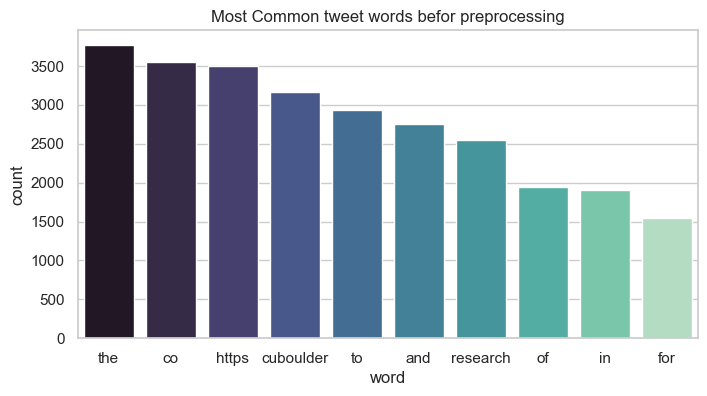

In [112]:
sns.set_style('whitegrid')
get_word_freq(df.tweet, "Most Common tweet words befor preprocessing")

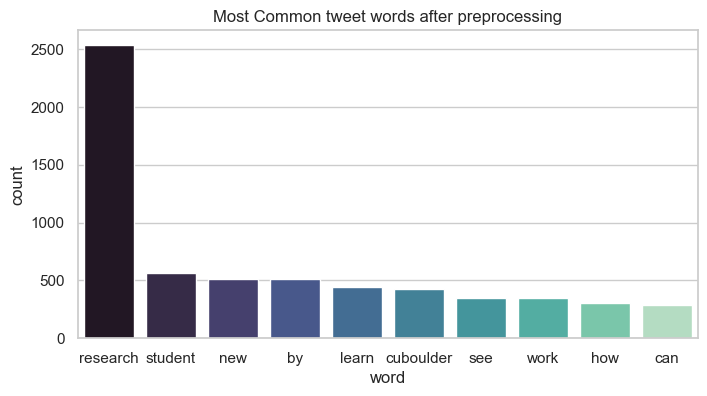

In [113]:
get_word_freq(df_clean.Processed_tweet, "Most Common tweet words after preprocessing")

---

---